<a href="https://colab.research.google.com/github/JanithaB/NeuralNets/blob/main/myTestCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
!pip install torch torchvision pillow numpy matplotlib

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(torch.cuda.is_available())  # Should return True if GPU is available
print(torch.cuda.get_device_name(0))  # Print the GPU name

True
Tesla T4


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [39]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
subset_indices = list(range(1000))
subset = torch.utils.data.Subset(trainset, subset_indices)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
subset_indices = list(range(1500, 2000))
subset = torch.utils.data.Subset(testset, subset_indices)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [15]:
class testCNN(torch.nn.Module):
    def __init__(self):
        super(testCNN, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=3),
            torch.nn.BatchNorm2d(16),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = torch.nn.Linear(7*7*64, 500)
        self.fc2 = torch.nn.Linear(500, 100)
        self.fc3 = torch.nn.Linear(100, 10)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        out = self.layer1(x)      # 1st Conv layer
        out = self.layer2(out)    # 2nd Conv layer
        out = out.view(out.size(0), -1)  # flatten
        out = self.fc1(out)       # 1st fc layer
        out = self.relu(out)
        out = self.fc2(out)       # 2nd fc layer
        out = self.relu(out)
        out = self.fc3(out)       # output layer
        return out

net = testCNN().to(device) # initiate CNN class

In [17]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

Training loop

In [19]:
losses = []
epochs = 100
epoch = 0
while epoch<epochs and (running_loss/100)>0.1:
  running_loss = 0.0
  for idx, (inputs, labels) in enumerate(trainloader):
    inputs, labels = inputs.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = net(inputs)
    loss_train = loss(outputs, labels)
    losses.append(loss_train.item())
    loss_train.backward()
    optimizer.step()

    running_loss += loss_train.item()
  print(f'Epoch {epoch + 1}, Loss: {running_loss / 100:.3f}')
  running_loss = 0.0
  epoch += 1


print("Training is Finished!")

Training is Finished!


In [41]:
net.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)  # Add the number of samples in the current batch
        correct += (predicted == labels).sum().item()  # Add the number of correct predictions

# Calculate accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the network on the test images: {accuracy:.2f}%')


Accuracy of the network on the test images: 98.94%


Labels: tensor([4, 7, 5, 9, 9, 3, 5, 0, 2, 6, 8, 3, 7, 6, 3, 2, 1, 3, 8, 3, 2, 8, 4, 3,
        3, 9, 4, 6, 3, 1, 9, 7, 4, 9, 3, 8, 4, 0, 7, 4, 0, 8, 4, 8, 2, 8, 2, 1,
        4, 7, 0, 8, 6, 4, 4, 0, 1, 2, 9, 8, 5, 8, 6, 0])


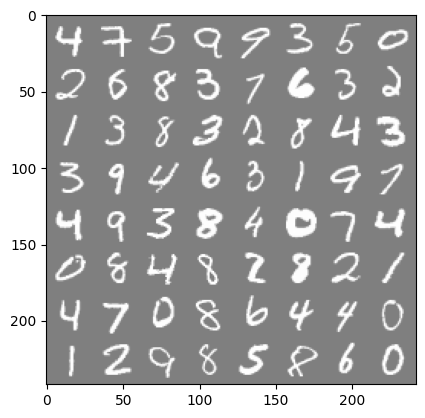

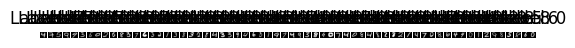

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of data from the testloader
data_iter = iter(testloader)
inputs, labels = next(data_iter)

# Plot the images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Print images and labels
print('Labels:', labels)
imshow(torchvision.utils.make_grid(inputs))

# Display the images and labels
for i in range(len(labels)):
    plt.subplot(1, len(labels), i+1)
    plt.imshow(inputs[i].squeeze(), cmap='gray')  # Remove channel dimension for grayscale
    plt.title(f'Label: {labels[i].item()}')
    plt.axis('off')

plt.show()
